# importing libs

In [1]:
import numpy
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# image processing

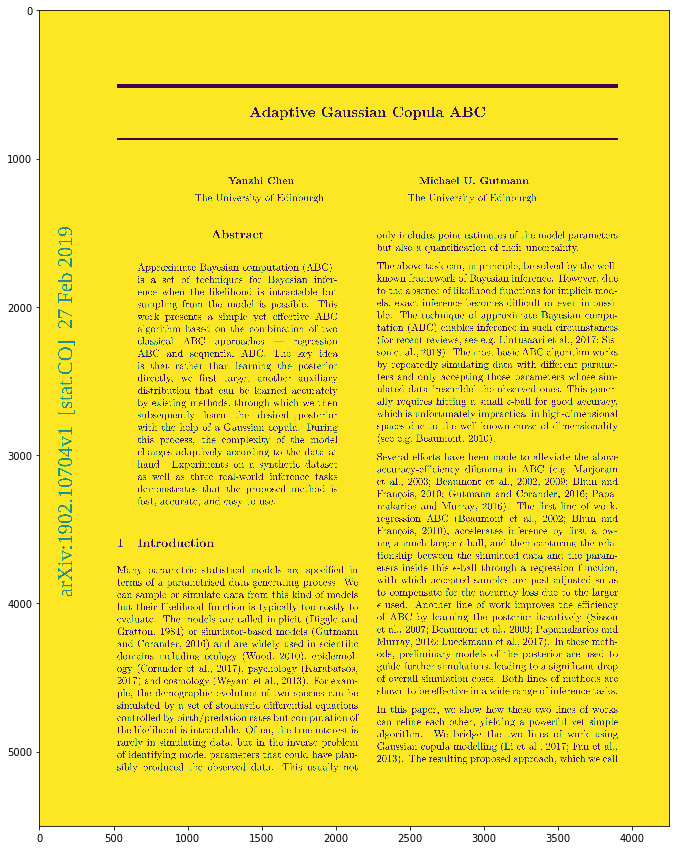

In [16]:
file = 'Statistics.jpg'
im = cv2.imread(file, 0)
plt.figure(figsize=(15, 15))
plt.imshow(im)

# Dilate

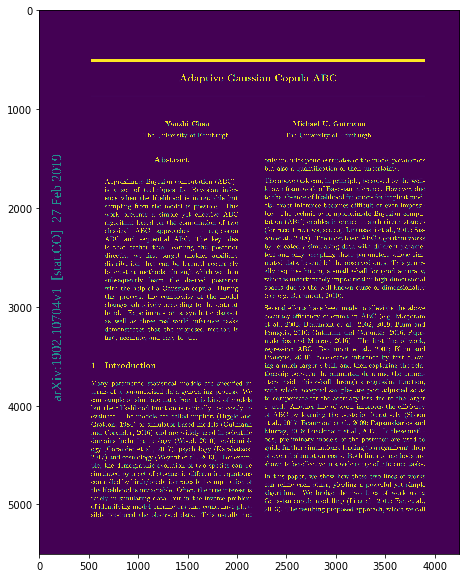

In [17]:
neg = cv2.bitwise_not(im)
plt.figure(figsize=(10, 10))
plt.imshow(neg)

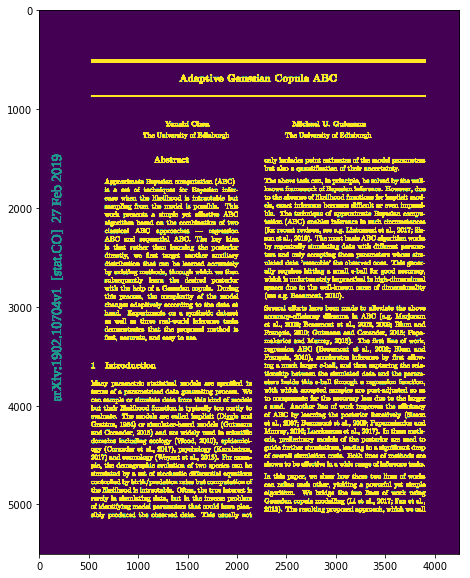

In [18]:
kernel = numpy.ones((10, 10))
dilated = cv2.dilate(neg, kernel, iterations=1)
plt.figure(figsize=(10, 10))
plt.imshow(dilated)

# Erode

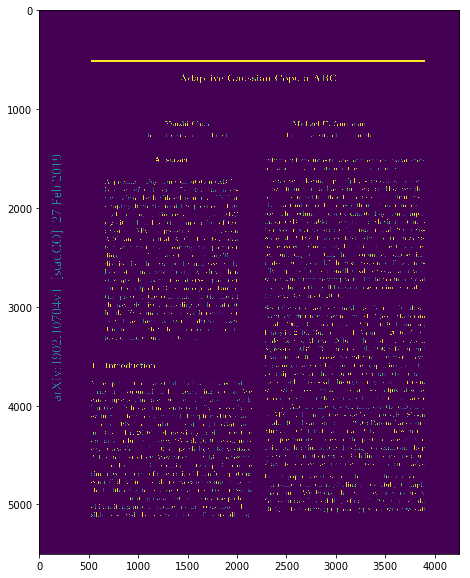

In [19]:
kernel = numpy.ones((3, 3))
eroded = cv2.erode(neg, kernel, iterations=1)
plt.figure(figsize=(10, 10))
plt.imshow(eroded)

# Gradient

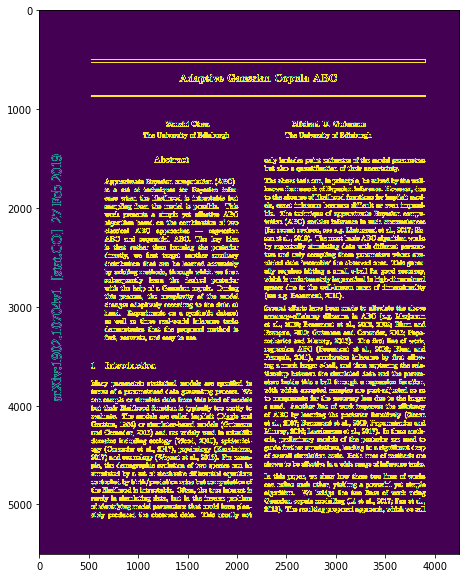

In [20]:
gradient = dilated - eroded
plt.figure(figsize=(10, 10))
plt.imshow(gradient)

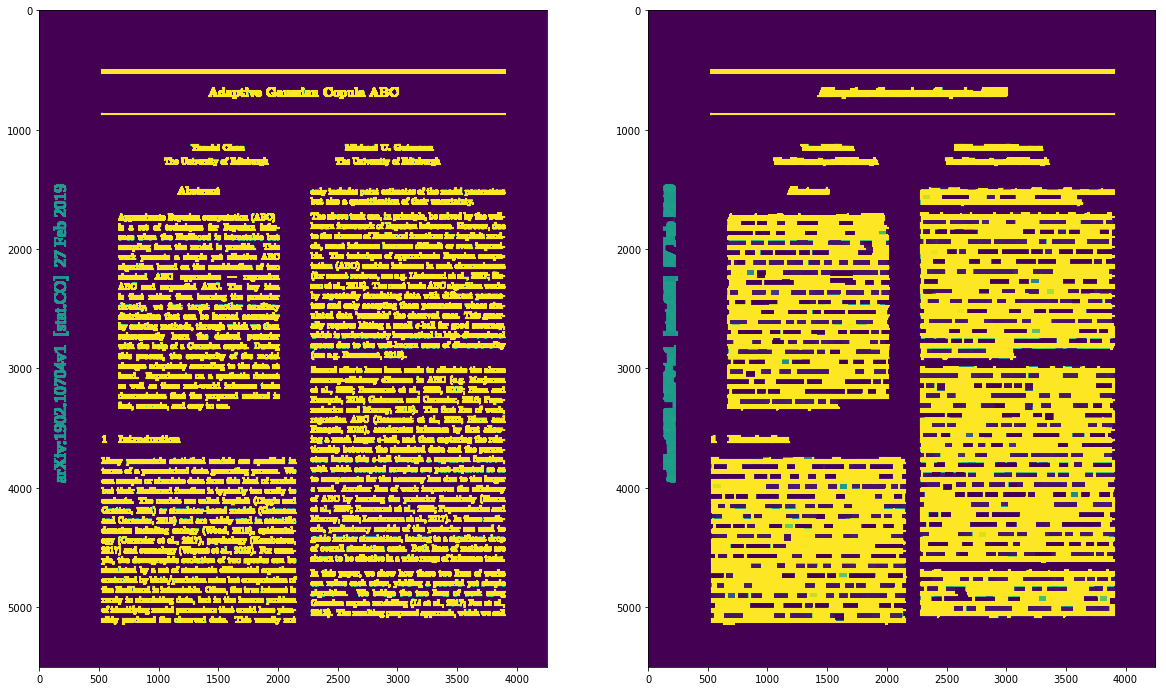

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
dilate = cv2.morphologyEx(neg, cv2.MORPH_DILATE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (16, 9))
connected = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel, iterations=4)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(dilate)
fig.add_subplot(1, 2, 2)
plt.imshow(connected)

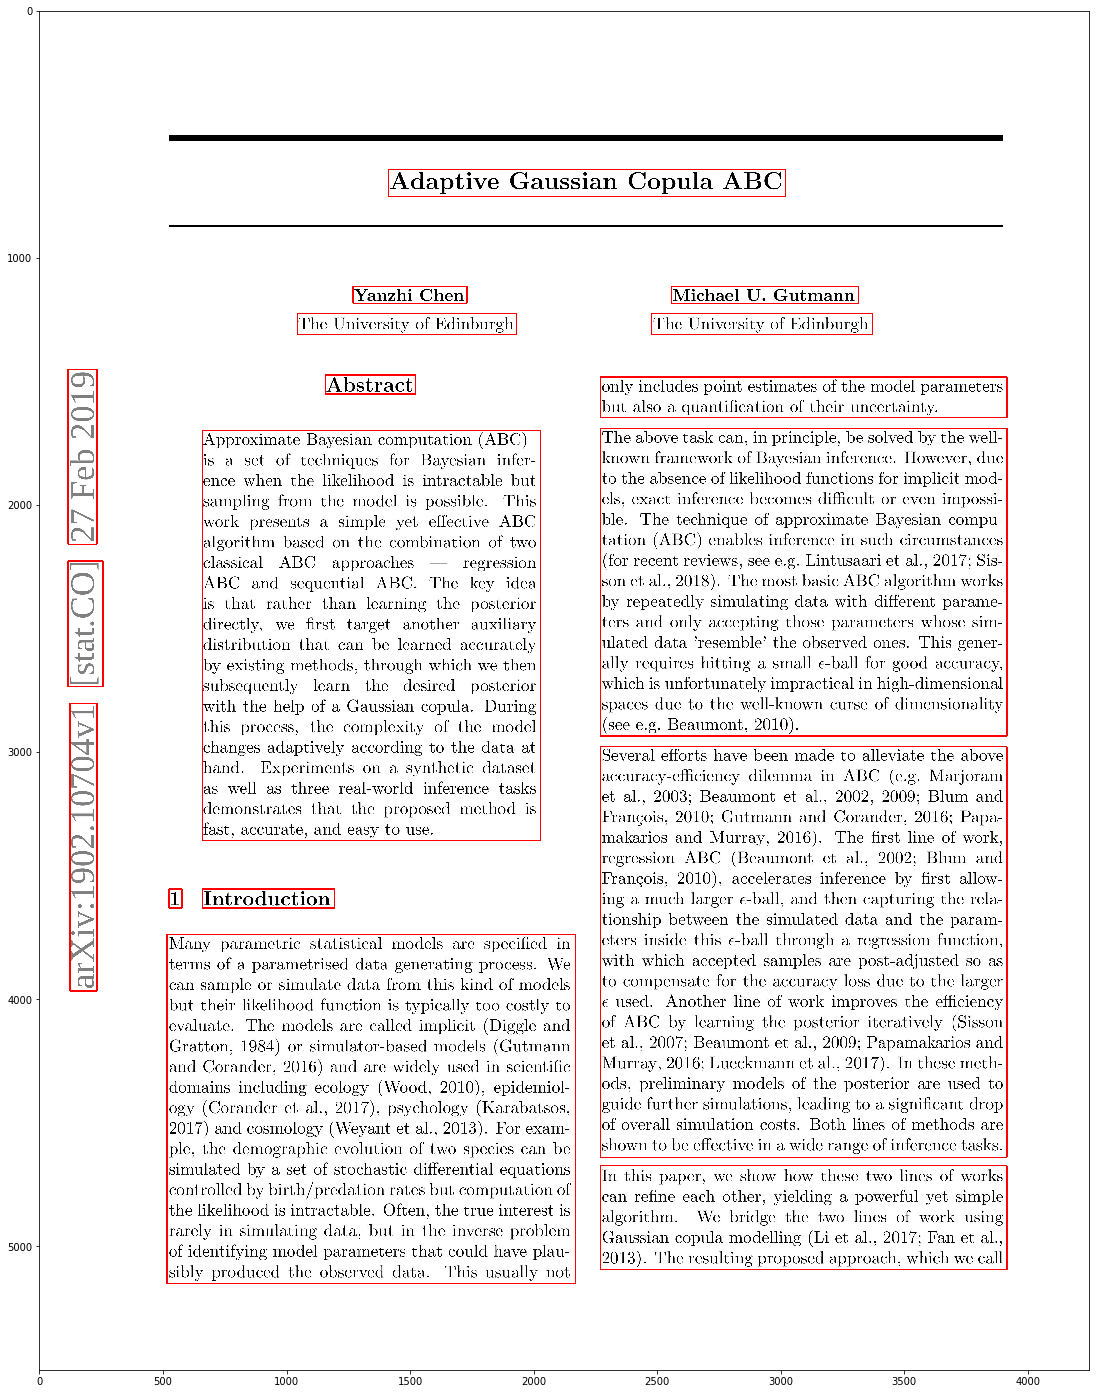

In [22]:
vis = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
contours, hierarchy = cv2.findContours(connected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boxes = map(lambda c: cv2.boundingRect(c), contours)
filtered = filter(lambda b: b[2] > 20 and b[3] > 50, boxes)

idx = 0
for (x, y, w, h) in filtered:
    cv2.rectangle(vis, (x, y), (x+w-1, y+h-1), (255, 0, 0), 3)
    #crop_img = vis[y:y+h, x:x+w]
    crop_img = vis[y:y+h-1, x:x+w-1]
    cv2.imwrite('./output/Statistics/cropped'+str(idx)+'.jpg',crop_img)
    idx +=1
plt.figure(figsize=(25, 25))
plt.imshow(vis)


In [ ]:
import os
import tempfile
import subprocess

In [ ]:
def ocr(path):
    temp = tempfile.NamedTemporaryFile(delete=False)

    process = subprocess.Popen(['tesseract', path, temp.name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    process.communicate()

    with open(temp.name + '.txt', 'r') as handle:
        contents = handle.read()

    os.remove(temp.name + '.txt')
    os.remove(temp.name)
    return contents

In [ ]:
for i in enumerate(filtered):
    a = ocr('./output/output4/cropped'+str(i)+'.jpg')
    if a.startswith("Abstract"):
        print(a)
        break
    else:
        print("not working")
        continue

In [9]:
import os
import tempfile
import subprocess

def ocr(path):
   temp = tempfile.NamedTemporaryFile(delete=False)

   process = subprocess.Popen(['tesseract', path, temp.name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
   process.communicate()

   with open(temp.name + '.txt', 'r') as handle:
       contents = handle.read()

   os.remove(temp.name + '.txt')
   os.remove(temp.name)

   return contents

str = ocr('./output/output4/cropped9.jpg')
print(str)

FileNotFoundError: [Errno 2] No such file or directory: 'tesseract': 'tesseract'

# Convolution zum Weichzeichnen

In [ ]:
from PIL import Image
pic = cv2.imread('documents/auto.jpg', 0)
kernel = numpy.array([[1/9.,1/9.,1/9.],
                      [1/9.,1/9.,1/9.], 
                      [1/9.,1/9.,1/9.]])
lines = cv2.filter2D(pic, cv2.CV_8U, kernel)
Image.fromarray(lines)

# Convolution zur Schärfung

In [ ]:
pic = cv2.imread('documents/auto.jpg', 0)
kernel = numpy.array([[0, -1, -0],
                      [-1, 5, -1], 
                      [0, -1, 0]])
lines = cv2.filter2D(pic, cv2.CV_8U, kernel)
Image.fromarray(lines)